# Exploratory Data Analysis (EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Samples from washing machine Beko
batch_1 = pd.read_csv("Data Processing/Beko/cleaned_data_Beko_MQTT_2024-05-04_serviettes_1.csv")
batch_2 = pd.read_csv("Data Processing/Beko/cleaned_data_Beko_MQTT_2024-05-04_serviettes_2.csv")
batch_3 = pd.read_csv("Data Processing/Beko/cleaned_data_Beko_MQTT_2024-05-04_vide_1.csv")
batch_4 = pd.read_csv("Data Processing/Beko/cleaned_data_Beko_MQTT_2024-05-04_vide_2.csv")

# Samples from washing machine Whirlpool
batch_5 = pd.read_csv("Data Processing/Whirlpool/cleaned_data_Whirlpool_MQTT_2024-05-06_serviettes_1.csv")
batch_6 = pd.read_csv("Data Processing/Whirlpool/cleaned_data_Whirlpool_MQTT_2024-05-06_serviettes_2.csv")
batch_7 = pd.read_csv("Data Processing/Whirlpool/cleaned_data_Whirlpool_MQTT_2024-05-06_vide_1.csv")
batch_8 = pd.read_csv("Data Processing/Whirlpool/cleaned_data_Whirlpool_MQTT_2024-05-06_vide_2.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


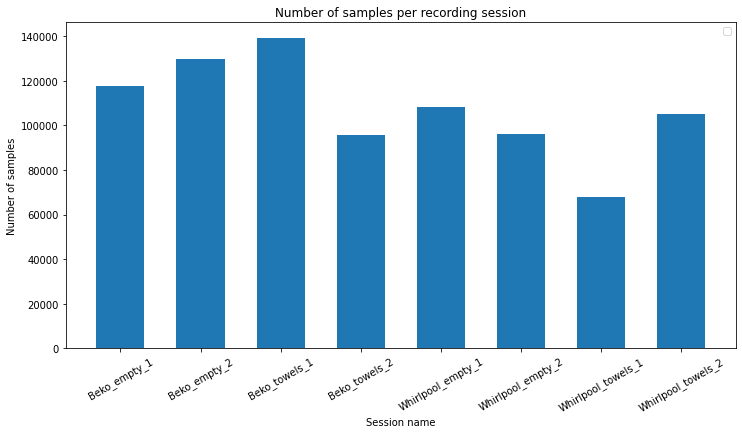

In [4]:
batch_name = ["Beko_empty_1","Beko_empty_2","Beko_towels_1","Beko_towels_2",
              "Whirlpool_empty_1","Whirlpool_empty_2","Whirlpool_towels_1","Whirlpool_towels_2"]
batch_size = [batch_1.index.stop, batch_2.index.stop, batch_3.index.stop, batch_4.index.stop,
             batch_5.index.stop, batch_6.index.stop, batch_7.index.stop, batch_8.index.stop]

plt.figure(figsize=(12, 6))
plt.bar(batch_name, batch_size, width = 0.6)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Number of samples per recording session')
plt.xlabel('Session name')
plt.ylabel('Number of samples')
plt.legend()
plt.savefig("sample_recording.png")
plt.show()

In [5]:
# Init test and train 
df_train = pd.concat([batch_1, batch_2, batch_3, batch_5, batch_6, batch_8], axis=0)
df_validation = pd.concat([batch_4, batch_7], axis=0)

# drop unrelevant columns
df_train = df_train.drop(['index'], axis=1)
df_validation = df_validation.drop(['index'], axis=1)

In [6]:
# Description of the dataset
df_train.describe()

,timestamp,MPU6050_accel_x,MPU6050_accel_y,MPU6050_accel_z,MPU6050_total_magnitude,ADXL345_accel_x,ADXL345_accel_y,ADXL345_accel_z,ADXL345_total_magnitude
count,6.957600e+05,695760.000000,695760.000000,695760.000000,695760.000000,695760.000000,695760.000000,695760.000000,695760.000000
mean,5.378418e+05,0.306486,12.787409,0.558451,13.092544,-0.752503,9.897931,-0.474637,10.312350
std,3.132318e+05,2.011115,0.724632,2.024883,1.085696,1.782126,1.691347,2.231292,1.852380
min,1.666000e+03,-25.797523,3.457227,-24.334665,7.815659,-40.168037,-14.278482,-40.168037,0.597482
25%,2.652272e+05,-0.138864,12.703634,0.251391,12.762145,-1.176798,9.335931,-1.019892,9.551012
50%,5.340935e+05,0.308852,12.787432,0.562637,12.828007,-0.784532,9.963556,-0.470719,10.059463
75%,8.077645e+05,0.675165,12.871228,0.857124,12.989008,-0.313813,10.434276,0.000000,10.715685
max,1.118409e+06,25.548527,20.542250,30.348900,36.814049,38.991241,33.813332,40.128811,52.766586


In [7]:
# Description of the dataset
df_validation.describe()

,timestamp,MPU6050_accel_x,MPU6050_accel_y,MPU6050_accel_z,MPU6050_total_magnitude,ADXL345_accel_x,ADXL345_accel_y,ADXL345_accel_z,ADXL345_total_magnitude
count,1.633070e+05,163307.000000,163307.000000,163307.000000,163307.000000,163307.000000,163307.000000,163307.000000,163307.000000
mean,4.473710e+05,0.247194,12.789258,0.553347,12.839994,-0.811372,9.894596,-0.468776,10.034306
std,3.403662e+05,0.809039,0.343616,0.535983,0.356187,0.780476,1.646211,1.151344,1.654854
min,1.169000e+03,-6.184223,10.900801,-4.132392,11.016884,-10.983448,0.000000,-7.374601,1.967596
25%,1.895495e+05,-0.045490,12.691663,0.320823,12.728165,-1.176798,9.179025,-1.019892,9.271097
50%,3.695210e+05,0.213084,12.789825,0.577003,12.814518,-0.784532,9.963556,-0.392266,10.003629
75%,6.103365e+05,0.541090,12.887988,0.773327,12.937167,-0.470719,10.591182,0.078453,10.721715
max,1.283893e+06,7.694964,14.678850,5.197812,15.982175,7.531507,18.671862,7.217694,19.213188


In [8]:
# Overview of the dataset
df_train.tail()

,timestamp,MPU6050_accel_x,MPU6050_accel_y,MPU6050_accel_z,MPU6050_total_magnitude,ADXL345_accel_x,ADXL345_accel_y,ADXL345_accel_z,ADXL345_total_magnitude,washing_machine
105152,1104675,0.794875,12.806585,0.332794,12.835544,-0.941438,9.492837,-0.392266,9.547467,Whirlpool
105153,1104680,0.471658,12.756307,0.454898,12.773127,-0.706079,9.179025,0.000000,9.206141,Whirlpool
105154,1104688,0.581791,12.691663,0.471658,12.713742,-0.078453,9.649744,0.000000,9.650064,Whirlpool
105155,1104693,0.497994,12.753913,0.464475,12.772080,-0.470719,10.198916,0.156906,10.210979,Whirlpool
105156,1104700,0.447716,12.789825,0.876278,12.827625,-0.156906,9.414384,-0.313813,9.420919,Whirlpool


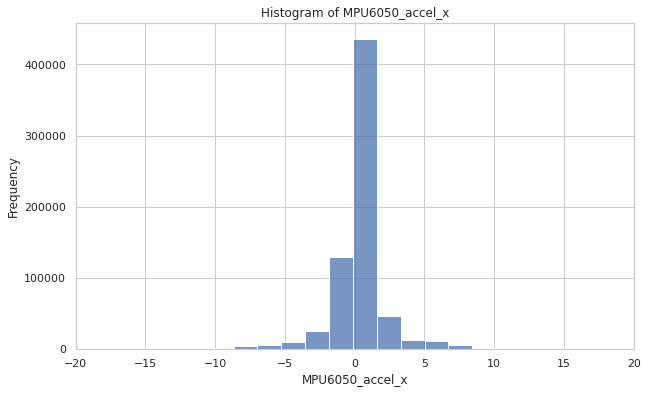

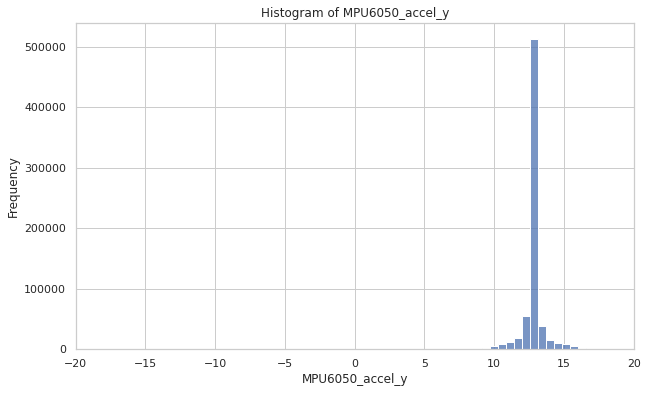

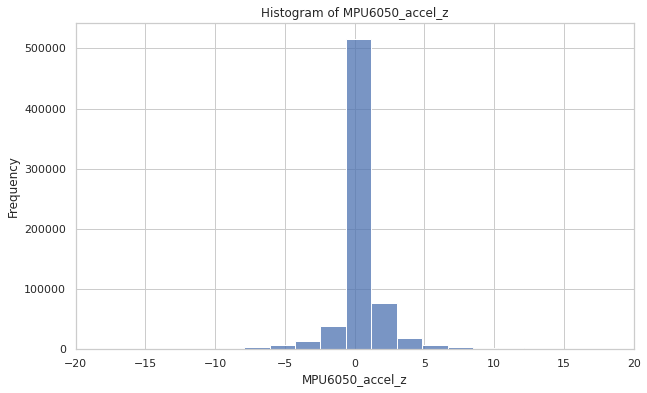

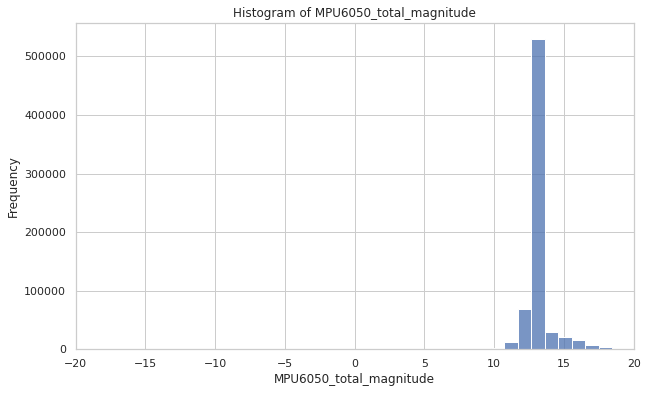

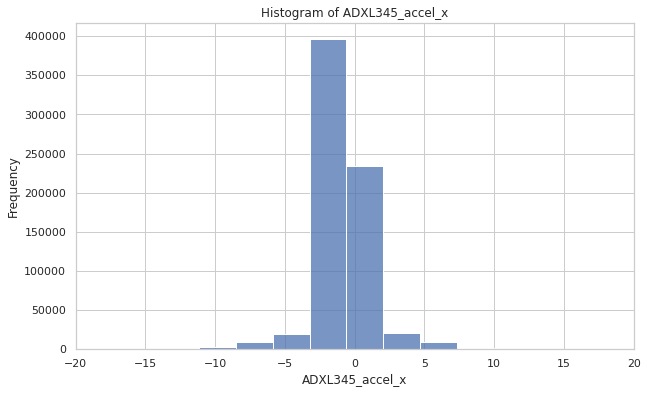

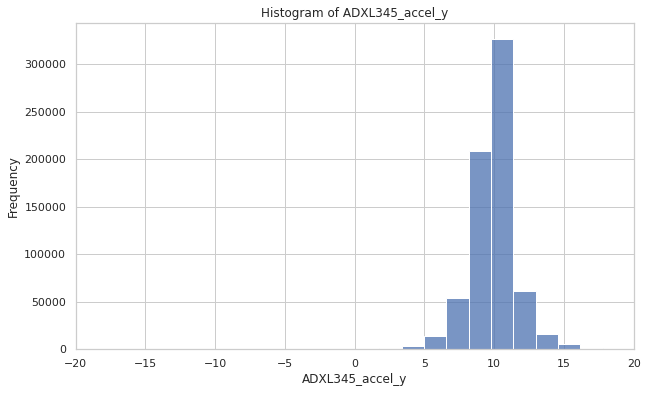

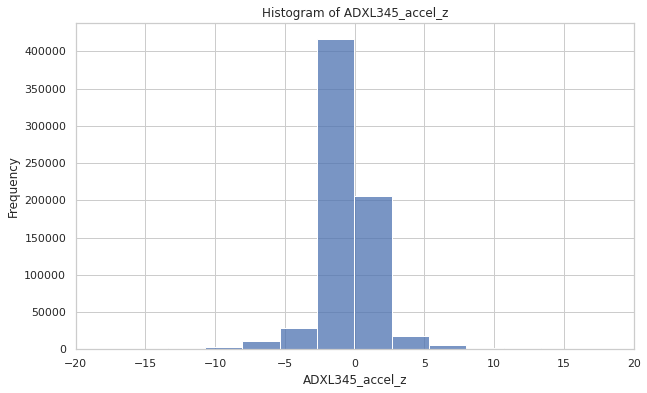

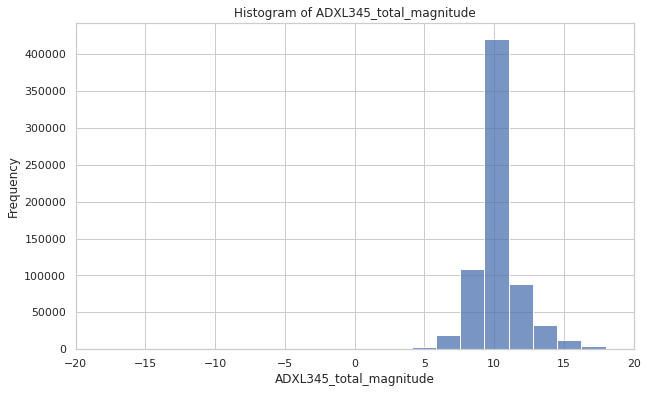

In [9]:
# Univariate analysis: visualize histogram
numeric_columns = [
    'MPU6050_accel_x', 'MPU6050_accel_y', 'MPU6050_accel_z', 
    'MPU6050_total_magnitude', 'ADXL345_accel_x', 
    'ADXL345_accel_y', 'ADXL345_accel_z', 'ADXL345_total_magnitude'
]

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms
x_limits = (-20, 20)
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train[col], bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.xlim(x_limits)
    plt.ylabel('Frequency')
    plt.show()


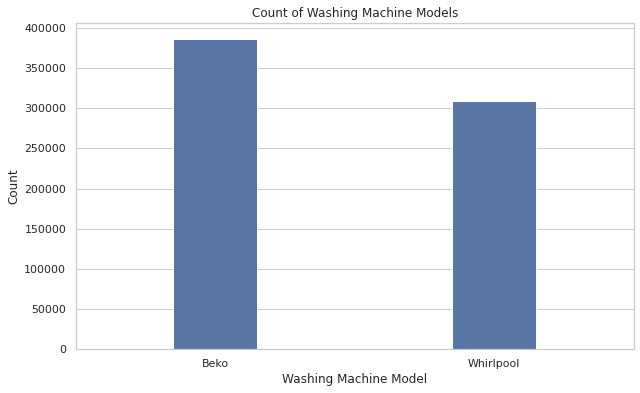

In [10]:
# Plot categorical data
plt.figure(figsize=(10, 6))
sns.countplot(x='washing_machine', data=df_train, width = 0.3)
plt.title('Count of Washing Machine Models')
plt.xlabel('Washing Machine Model')
plt.ylabel('Count')
plt.show()

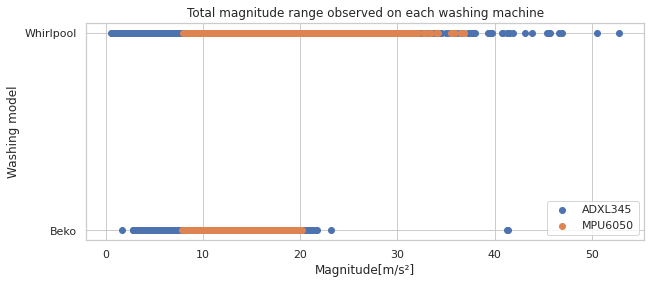

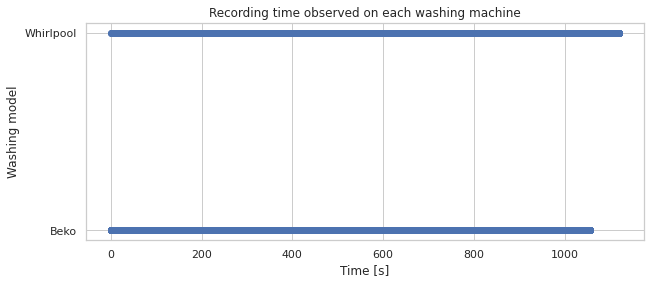

<AxesSubplot:xlabel='ADXL345_total_magnitude', ylabel='MPU6050_total_magnitude'>

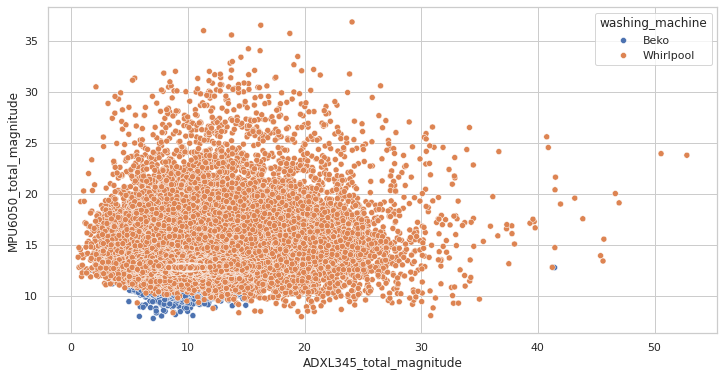

In [11]:
# Multivariate analysis: scatter plots

fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df_train['ADXL345_total_magnitude'], df_train['washing_machine'], label ='ADXL345')
ax.scatter(df_train['MPU6050_total_magnitude'], df_train['washing_machine'], label ='MPU6050')
ax.legend()
ax.set_title('Total magnitude range observed on each washing machine')
ax.set_xlabel('Magnitude[m/s²]')
ax.set_ylabel('Washing model')
plt.savefig("magnitude_multivariate.png")
plt.show()

fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df_train['timestamp']/1000, df_train['washing_machine'])
ax.set_title('Recording time observed on each washing machine')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Washing model')
plt.savefig("time_multivariate.png")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_train['ADXL345_total_magnitude'],y=df_train['MPU6050_total_magnitude'], hue=df_train['washing_machine'])

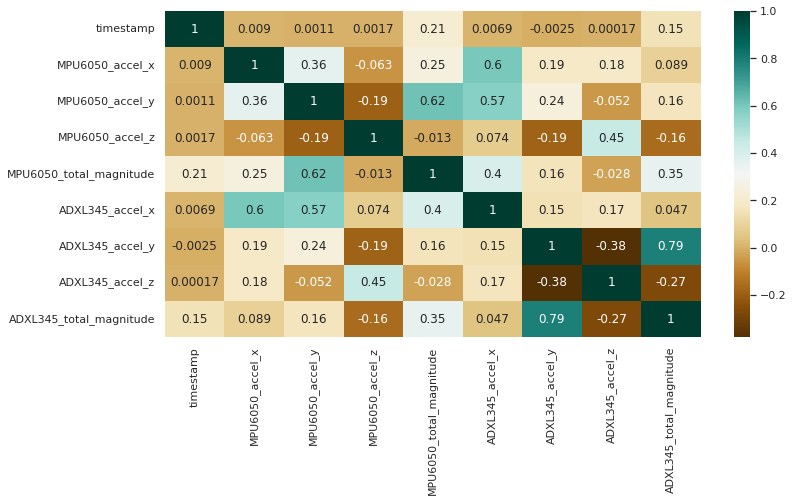

In [12]:
# Multivariate analysis: visualize heatmap
plt.figure(figsize=(12, 6))
c= df_train.drop(['washing_machine'],axis=1).corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.savefig("correlation_multivariate.png")

**Source:**
- https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/